In [37]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils.np_utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('MNIST_784')
# the data, split between train and test sets
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# print(x_train.shape, y_train.shape)
# print(x_test.shape, y_test.shape)

In [38]:
x = mnist['data']
y = mnist['target']

print(x.shape)

(70000, 784)


In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train,y_test = train_test_split(x,y,test_size=0.14,random_state=0)

7


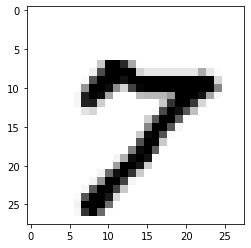

In [43]:
import matplotlib
import matplotlib.pyplot as plt
i=69000
digit = x[i]
digit_image = digit.reshape(28,28)
plt.imshow(digit_image,cmap = matplotlib.cm.binary,interpolation = "nearest")
print(y[i])

In [44]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
num_classes = 10
input_shape = (28, 28, 1)
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60199, 28, 28, 1)
60199 train samples
9801 test samples


In [45]:
batch_size = 32
num_classes = 10
epochs = 100
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [46]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/100
1882/1882 [==============================] - 111s 59ms/step - loss: 2.2359 - accuracy: 0.2430 - val_loss: 2.1220 - val_accuracy: 0.6222
Epoch 2/100
1882/1882 [==============================] - 114s 60ms/step - loss: 1.9918 - accuracy: 0.5344 - val_loss: 1.7663 - val_accuracy: 0.7453
Epoch 3/100
1882/1882 [==============================] - 121s 64ms/step - loss: 1.5772 - accuracy: 0.6497 - val_loss: 1.2566 - val_accuracy: 0.7883
Epoch 4/100
1882/1882 [==============================] - 137s 73ms/step - loss: 1.1613 - accuracy: 0.7043 - val_loss: 0.8802 - val_accuracy: 0.8157
Epoch 5/100
1882/1882 [==============================] - 139s 74ms/step - loss: 0.9034 - accuracy: 0.7461 - val_loss: 0.6862 - val_accuracy: 0.8348
Epoch 6/100
1882/1882 [==============================] - 147s 78ms/step - loss: 0.7696 - accuracy: 0.7713 - val_loss: 0.5832 - val_accuracy: 0.8475
Epoch 7/100
1882/1882 [==============================] - 140s 74ms/step - loss: 0.6798 - accuracy: 0.7941 - val_

KeyboardInterrupt: 

In [47]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np

model = load_model('mnist.h5')

def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('LA')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0

        # Creating elements
        #self.canvas = tk.Canvas(self, width=300, height=300, bg = "black", cursor="cross")
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =         self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)

        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)

        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)

        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')
        #self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill="white")

app = App()
mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\AMIT KUMAR\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-47-7271da3e6d1b>", line 53, in classify_handwriting
    digit, acc = predict_digit(im)
  File "<ipython-input-47-7271da3e6d1b>", line 17, in predict_digit
    img = img.reshape(1,28,28,1)
ValueError: cannot reshape array of size 1568 into shape (1,28,28,1)
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\AMIT KUMAR\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-47-7271da3e6d1b>", line 53, in classify_handwriting
    digit, acc = predict_digit(im)
  File "<ipython-input-47-7271da3e6d1b>", line 17, in predict_digit
    img = img.reshape(1,28,28,1)
ValueError: cannot reshape array of size 1568 into shape (1,28,28,1)
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\User

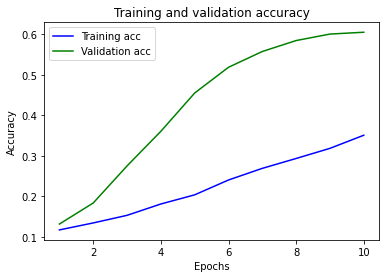

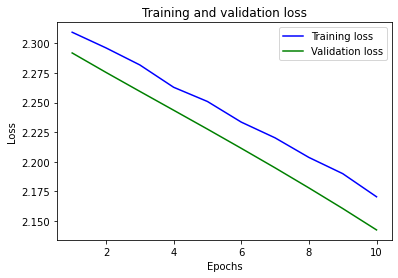

In [22]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.title('Training and validation accuracy')
plt.legend()
fig = plt.figure()
fig.savefig('acc.png')


plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')

plt.legend()
plt.show()


In [23]:
pip install utils